In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("Merged_i80.csv")

In [15]:
df

,Unnamed: 0,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,...,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway,Location,Period
0,469,1,481,884,1.113430e+12,17.280,568.096538,6042778.483,2133634.247,14.3,...,2,22.489895,-1.268826,2,3355,11,27.73,1.21,i80,4:00PM - 4:15PM
1,470,1,482,884,1.113430e+12,17.286,570.339191,6042778.197,2133636.562,14.3,...,2,22.363148,-1.306286,2,3355,11,28.27,1.26,i80,4:00PM - 4:15PM
2,471,1,483,884,1.113430e+12,17.291,572.568940,6042777.928,2133638.743,14.3,...,2,22.231830,-1.361708,2,3355,11,28.90,1.33,i80,4:00PM - 4:15PM
3,472,1,484,884,1.113430e+12,17.297,574.785277,6042777.668,2133640.849,14.3,...,2,22.094923,-1.442212,2,3355,11,29.64,1.42,i80,4:00PM - 4:15PM
4,473,1,485,884,1.113430e+12,17.301,576.987631,6042777.419,2133642.862,14.3,...,2,21.952162,-1.503987,2,3355,11,30.44,1.50,i80,4:00PM - 4:15PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242162,1048570,1757,6959,1386,1.113438e+12,29.320,654.857278,6042779.679,2133721.623,30.3,...,3,0.000000,-0.000091,3,1744,1764,158.90,9999.99,i80,5:15PM - 5:30PM
1242163,1048571,1757,6960,1386,1.113438e+12,29.320,654.857278,6042779.679,2133721.623,30.3,...,3,0.000000,0.000089,3,1744,1764,159.68,9999.99,i80,5:15PM - 5:30PM
1242164,1048572,1757,6961,1386,1.113438e+12,29.320,654.857278,6042779.679,2133721.623,30.3,...,3,0.000000,-0.000159,3,1744,1764,160.65,9999.99,i80,5:15PM - 5:30PM
1242165,1048573,1757,6962,1386,1.113438e+12,29.320,654.857278,6042779.679,2133721.623,30.3,...,3,0.000000,0.000182,3,1744,1764,161.68,9999.99,i80,5:15PM - 5:30PM


In [4]:
global_times = df['Global_Time']

# Convert timestamps to datetime objects
timestamps = [datetime.fromtimestamp(time / 1000) for time in global_times]

# Format datetime objects as dd.mm.yyyy
formatted_dates = [timestamp.strftime("%d.%m.%Y") for timestamp in timestamps]


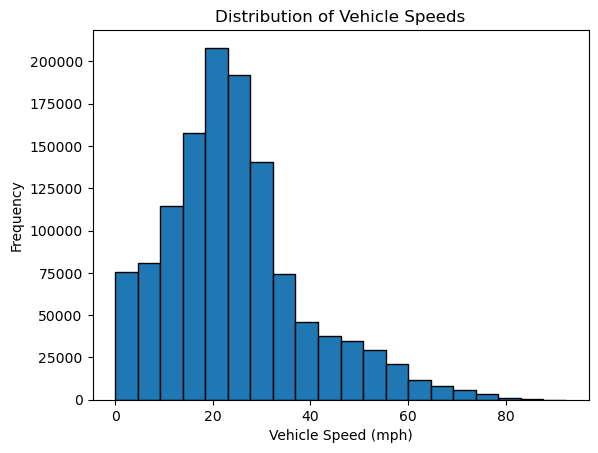

In [5]:
# Extract the 'v_Vel' column for vehicle speeds
vehicle_speeds = df['v_Vel']

# Create the histogram
plt.hist(vehicle_speeds, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Vehicle Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Speeds')

# Show the histogram
plt.show()


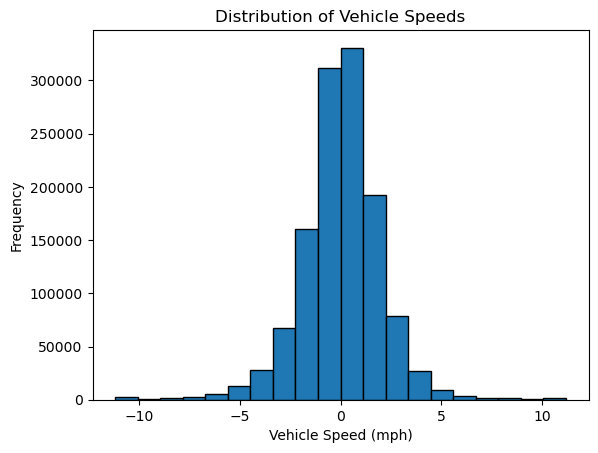

In [6]:
# Extract the 'v_Vel' column for vehicle speeds
vehicle_speeds = df['v_Acc']

# Create the histogram
plt.hist(vehicle_speeds, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Vehicle Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Speeds')

# Show the histogram
plt.show()

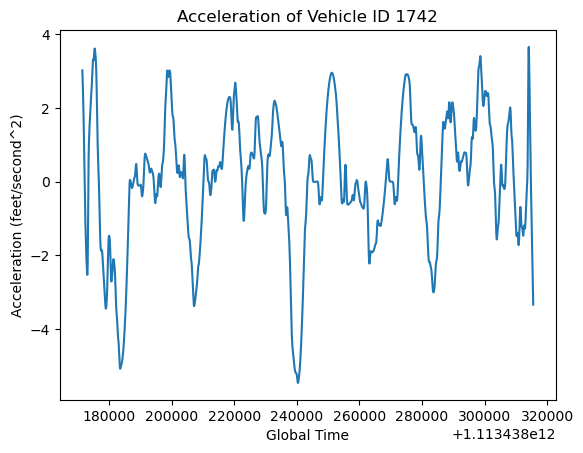

In [11]:
# Select a specific vehicle ID for comparison
vehicle_id = 1742

# Filter the dataset for the selected vehicle ID
vehicle_data = df[df['Vehicle_ID'] == vehicle_id]

# Extract the acceleration and global time columns
acc = vehicle_data['v_Acc']
global_time = vehicle_data['Global_Time']

# Create a line plot of acceleration over global time
plt.plot(global_time, acc)

# Add labels and title
plt.xlabel('Global Time')
plt.ylabel('Acceleration (feet/second^2)')
plt.title('Acceleration of Vehicle ID {}'.format(vehicle_id))

# Show the plot
plt.show()

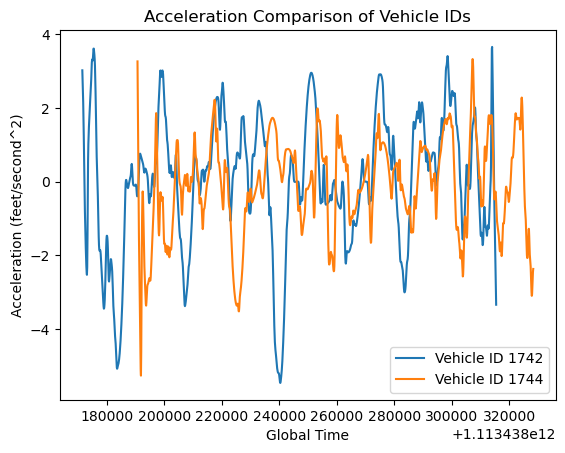

In [16]:
# Select the vehicle IDs for comparison
vehicle_ids = [1742, 1744]  # Add the additional vehicle IDs here

# Create an empty plot
plt.figure()

# Iterate over the selected vehicle IDs
for vehicle_id in vehicle_ids:
    # Filter the dataset for the selected vehicle ID
    vehicle_data = df[df['Vehicle_ID'] == vehicle_id]

    # Extract the acceleration and global time columns
    acc = vehicle_data['v_Acc']
    global_time = vehicle_data['Global_Time']

    # Create a line plot of acceleration over global time for each vehicle ID
    plt.plot(global_time, acc, label='Vehicle ID {}'.format(vehicle_id))

# Add labels and title
plt.xlabel('Global Time')
plt.ylabel('Acceleration (feet/second^2)')
plt.title('Acceleration Comparison of Vehicle IDs')

# Add a legend
plt.legend()

# Show the plot
plt.show()


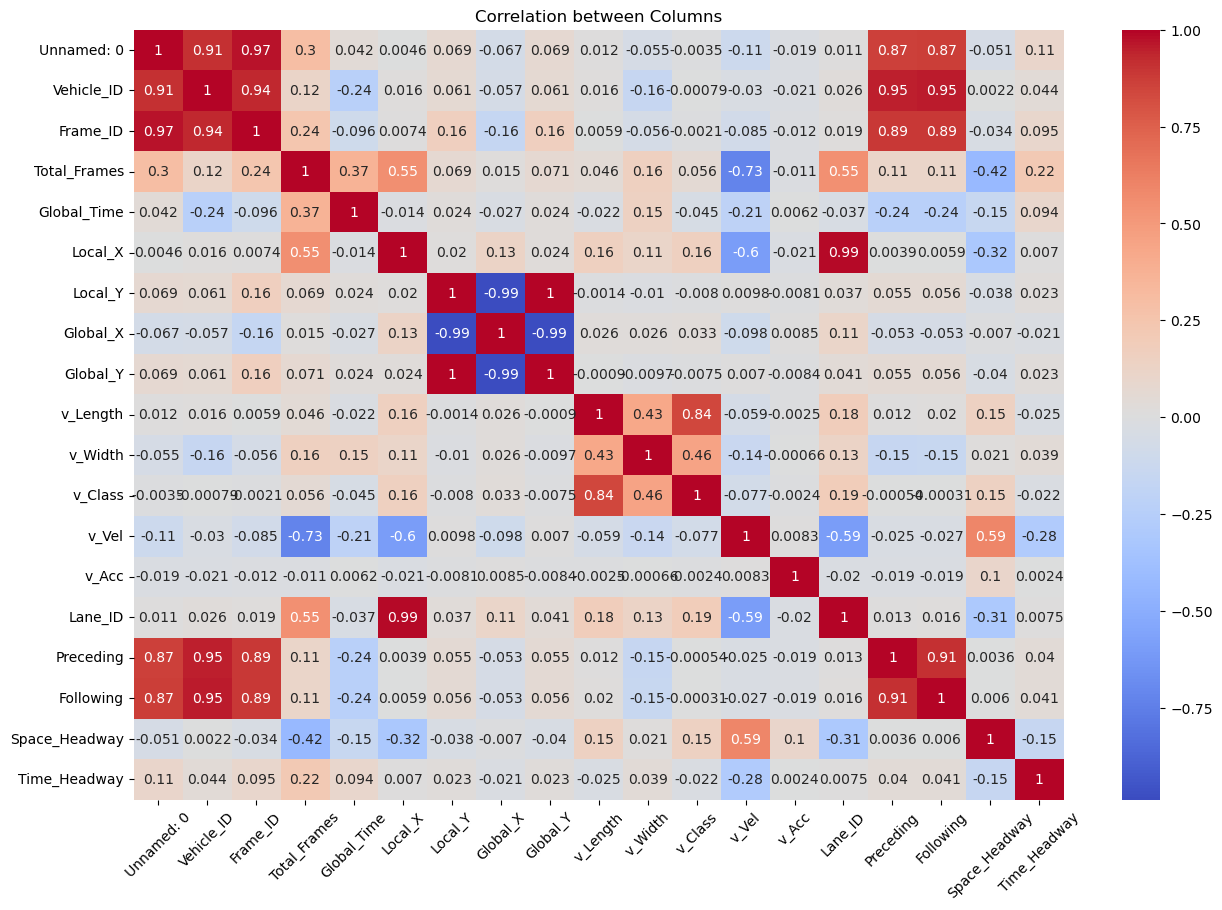

In [13]:
corr_matrix = df.corr()

# Generate the heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation between Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()